## ADS1115 Analog to Digitial Converter  

The ADS1115 is a 16 bit resolution analog to digitial converter.

Manufacturer Link: www.ti.com/product/ADS1115  

Breakout Board Used: https://www.adafruit.com/product/1085

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from meerkat import ads, parser

In [2]:
dev = ads.ADS1115(bus_n=1)

#### Configuration

In [3]:
dev.pga('6.144')  # Other options: '6.144', '4.096'
dev.mux('0G')     # pin 0 relative to ground

In [4]:
dev.print_attributes()

ADS11x5 Configuration Attributes
--------------------------------
Config Register: 49539 0xc183 0b1100000110000011
PGA Range: +/- 6.144 Volts
Mode: single
Data Rate: 128 SPS
Input Multiplexer: 0G
Comparator:
 Queue: off
 Latching: off
 Polarity: Active 1
 Mode: trad


#### Measurements  
For this demo, voltage reference source is connected to A0

In [5]:
print('Measured voltage: {}'.format(dev.voltage()))

Measured voltage: 3.007875


In [6]:
dev.get(description='ADS1115_example_1', n=5)

[['ADS1115_example_1', 1, 4, 3.0080625],
 ['ADS1115_example_1', 2, 4, 3.0084375],
 ['ADS1115_example_1', 3, 4, 3.0073125000000003],
 ['ADS1115_example_1', 4, 4, 3.0075000000000003],
 ['ADS1115_example_1', 5, 4, 3.0075000000000003]]

#### CSV Writer Output

In [7]:
dev.write(description='test_1', n=15)

In [8]:
m, df = parser.csv_resource(dev.writer.path)

In [9]:
df.head()

,std_time_ms,description,sample_n,mux,voltage,datetime64_ns
0,2019-06-02 14:18:03.792140,test_1,1,4,3.008250,2019-06-02 14:18:03.792140
1,2019-06-02 14:18:03.804750,test_1,2,4,3.008250,2019-06-02 14:18:03.804750
2,2019-06-02 14:18:03.818488,test_1,3,4,3.008062,2019-06-02 14:18:03.818488
3,2019-06-02 14:18:03.835168,test_1,4,4,3.008062,2019-06-02 14:18:03.835168
4,2019-06-02 14:18:03.847159,test_1,5,4,3.008062,2019-06-02 14:18:03.847159


In [10]:
df['rolling_mean'] = df.voltage.rolling(4, win_type='triang').mean()

In [11]:
df_mean = df.voltage.mean()
df['mean'] = df_mean

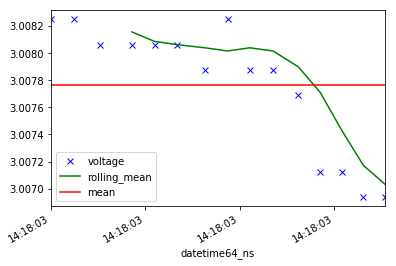

In [12]:
df.datetime64_ns = df.datetime64_ns.dt.tz_localize('UTC')  # Pandas 0.24.1 hack
df[['datetime64_ns', 'voltage',
    'rolling_mean', 'mean']].plot(x='datetime64_ns',
                                  style=[' xb', '-g', '-r']);

In [13]:
print('Mean: {:8.6} Volts DC'.format(df_mean))
print('Standard Deviation: {}'.format(df.voltage.std()))

Mean:  3.00776 Volts DC
Standard Deviation: 0.00048481402914620273


In [14]:
dt = df.datetime64_ns[len(df)-1]-df.datetime64_ns[0]
dtt = dt.seconds + dt.microseconds / 10**6
print('Sample Rate: {:.4f} Hz'.format(len(df)/dtt))

Sample Rate: 84.7185 Hz


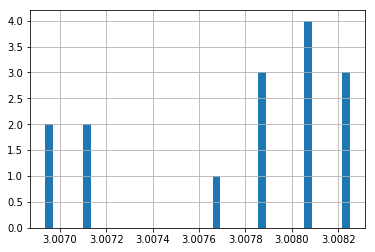

In [15]:
df.voltage.hist(bins=40);

#### JSON Writer Output

In [16]:
dev = ads.ADS1115(bus_n=1, output='json')
dev.pga('6.144')  # Other options: '6.144', '4.096'
dev.mux('0G')     # pin 0 relative to ground

In [17]:
dev.write(description='test_4', n=5)

In [18]:
with open(dev.writer.path, 'r') as f:
    print(f.readline())

{"mux": 4, "voltage": 3.0067500000000003, "std_time_ms": "2019-06-02 14:18:11.927137", "description": "test_4", "sample_n": 1}

